# Chapter 3 - Descriptive Statistics and Graphics

# Learning Objectives
* Understand the basic descriptive measures of central tendency
* Understand the basic descriptive measures of dispersion
* Understand the concept of relative variability
* Determine the value of measuring shape or relative position
* Realize potential effects of location data on descriptive statistics

## Summarizing Data Sets
* Measures of <b> central tendency </b>
 * Numbers that represent the center or typical value of a frequency distribution
 * Includes mode, median, and mean
 




## Summarizing Data Sets
* Measures of <b> dispersion </b>
 * Numbers that depict the amount of spread or variability in a data set
     * Includes range, interquartile range, standard deviation, variance, and coefficient variation

## Summarizing Data Sets
* Measures of <b> shape or relative position </b>
 * Numbers that further describe the nature or shape of a frequency distribution
     * Includes skewness – symmetry of a distribution
     * Includes kurtosis – degree of flatness or peakedness in a distribution

## Descriptive Statistics
* Mode
 * Value that occurs most frequently
* Median
 * Middle value from a set of ranked observations.  Value with equal number of data units above and below it.
* Mean
 * The arithmetic average of the values


<table>
<tr>
<td>
<img src="../figures/book/McGrew-et-al_3E---Figure-3-3.jpg" alt="Figure 3.3" width="250"/>
</td>
<td>
<img src="../figures/book/McGrew-et-al_3E---Figure-3-4.jpg" alt="Figure 3.4" width="400"/>
</td>
</tr>
</table>
S

In [3]:
import pandas as pd
tb31 = pd.read_excel('../data/ClassData.xlsx', index="3.1")
tb31

,Precip
0,26.87
1,26.94
2,28.28
3,29.48
4,31.56
5,32.78
6,33.07
7,33.62
8,34.98
9,35.09


In [12]:
#Divide into bins using cut function
tb31["Class"] = pd.cut(tb31["Precip"], bins=[25,30,35,40,45,50,55,60], labels=[1,2,3,4,5,6,7])
tb31

,Precip,Class
0,26.87,1
1,26.94,1
2,28.28,1
3,29.48,1
4,31.56,2
5,32.78,2
6,33.07,2
7,33.62,2
8,34.98,2
9,35.09,3


In [56]:
#get mean and count aggregates
grouped = tb31.groupby(['Class']).agg(['mean', 'sum', 'count'])
grouped = grouped.reset_index()
grouped['relativeFreq'] = grouped[grouped.columns[3]] / grouped[grouped.columns[3]].sum()
grouped

Class     Precip               relativeFreq
              mean     sum count             
0     1  27.892500  111.57     4        0.100
1     2  33.202000  166.01     5        0.125
2     3  37.090833  445.09    12        0.300
3     4  41.652222  374.87     9        0.225
4     5  47.058000  235.29     5        0.125
5     6  51.982500  207.93     4        0.100
6     7  57.540000   57.54     1        0.025

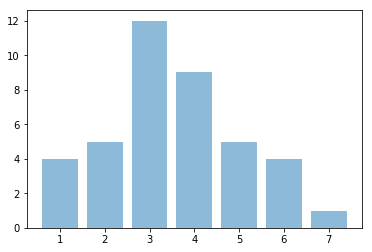

In [53]:
#Build Chart of class counts
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(x = grouped[grouped.columns[0]], height = grouped[grouped.columns[3]], align='center', alpha=0.5)

plt.show()

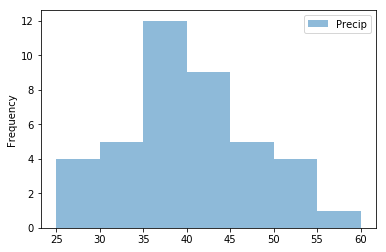

In [59]:
#Use Builtin histogram function instead
tb31.plot.hist(bins=[25,30,35,40,45,50,55,60], alpha=0.5)

<table>
<tr>
<td>
<img src="../figures/book/McGrew-et-al_3E---Figure-3-1.jpg" alt="Figure 3.1" width="300"/>
</td>
<td>
<img src="../figures/book/McGrew-et-al_3E---Figure-3-2.jpg" alt="Figure 3.1" width="300"/>
</td>
</tr>
</table>

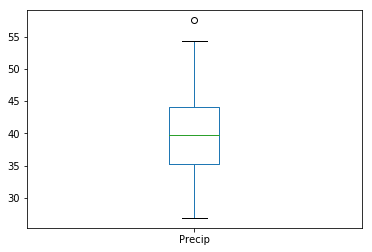

In [60]:
#Boxplot (Box and wisker plot) of the same data
tb31.plot.box()


<table>
<tr>
<td>
<img src="../figures/book/McGrew-et-al_3E---Figure-3-5.jpg" alt="Figure 3.5" width="300"/>
</td>
<td>
<img src="../figures/book/McGrew-et-al_3E---Figure-3-6.jpg" alt="Figure 3.6" width="300"/>
</td>
</tr>
</table>


##  Weighted Mean
 * Arithmetic average calculated from class intervals and class frequencies (often aggregate total)
 * Assumptions
    * Without information to the contrary, data are distributed evenly within the interval
    * Best summary representation of the values in each interval is the class midpoint
         * Class midpoint – value that is exactly midway between extreme values that identify the class interval

In [72]:
Mean = tb31['Precip'].mean()
wMean = (grouped[('Precip', 'mean')] * grouped[('Precip', 'count')]).sum() / grouped[('Precip', 'count')].sum()
Mean, wMean

(39.9575, 39.957499999999996)

## Relative Variability
* Defined as the amount of spread in a set of variables
* Spread can be measured in different ways
    * Simplest measure of variability is the range - difference between largest and smallest value
    * Quantiles are used to define intervals, portions, or percentiles
    * Interquartile range – data is divided into 4 equal portions.  Difference between 25th and 75th percentile is the interquartile range

## Standard Deviation and Variance
* Standard Deviation
    * The least squares property of the mean carries over into the most common measure of variability or dispersion
* Variance
    * The square of the standard deviation

In [83]:
#Calculate stdev and variance like table 3.7
tb31['sqdiff'] = (tb31['Precip'].mean() - tb31['Precip']) ** 2
variance = tb31['sqdiff'].sum() / (tb31['sqdiff'].count() -1)
stdev = variance ** 0.5
stdevALT = tb31['Precip'].std()
print(variance, stdev, stdevALT)

54.93239871794872 7.41163940825164 7.41163940825164


## Coefficient of Variation
* The Coefficient of Variation (CV) is simply the standard deviation expressed relative to the magnitude of the mean:
    * CV = s/mean or CF = (s/mean) * 100

In [84]:
#Calculate CV
CV = tb31['Precip'].mean() / tb31['Precip'].std()
CValt = CV * 100
print(CV, CValt)

5.391182409051621 539.1182409051621


## Standard Normal Distribution
* 68-95-99.7 rule

# Measures of Shape or Relative Position
* Skewness 
    * measures the degree of symmetry in a frequency distribution determines the extent to which the values are evenly or unevenly distributed on either side of the mean
* Kurtosis 
    * measures flatness or peakedness of a data set


<img src="../figures/book/McGrew-et-al_3E---Figure-3-10.jpg" alt="Figure 3.10" width="400"/>


In [86]:
#Calculate Skewness and Kurtosis
print(tb31['Precip'].skew(), tb31['Precip'].kurtosis())

0.35107203799902836 -0.2281710044598002


# Spatial Data and Descriptive Statistics
* The location of boundaries can affect various descriptive statistics
* The level of aggregation can also descriptive statistics
* MAUP (modifiable areal unit problem)
 

# Simple MAUP Explaination
<img src="https://bloximages.chicago2.vip.townnews.com/kansan.com/content/tncms/assets/v3/editorial/d/53/d53c2c1e-e876-11e8-b64d-1fdc611ff942/5beccdadd8a13.image.jpg" alt="MAUP" width="400" />



<img src="../figures/book/McGrew-et-al_3E---Figure-3-15.jpg" alt="Figure 3.15" width="400"/>

# Review
* Median, mode, and mean are used to measure central tendency
* Measures of dispersion is determined based on relative variability, standard deviation, and variance
* Boundary delineation, modifiable areal units, and spatial aggregation are all measurements of shape or relative position